In [58]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Nettoyage de données exclusivement avec Pandas

In [59]:
# Chargement des données à partir du fichier CSV
df = pd.read_csv('./total_stars.csv')

# Sélection des colonnes utiles : 'Mass', 'Distance', 'Radius'
df_clean = df[['Mass', 'Distance', 'Radius']].copy()

# Nettoyage : suppression des caractères non numériques dans la colonne 'Distance'
df_clean['Distance'] = df_clean['Distance'].replace(r'\D+', '', regex=True)

# Conversion des colonnes en valeurs numériques valides
df_clean['Mass'] = pd.to_numeric(df_clean['Mass'], errors='coerce')
df_clean['Radius'] = pd.to_numeric(df_clean['Radius'].replace(r'[^\d.]', '', regex=True), errors='coerce')
df_clean['Distance'] = pd.to_numeric(df_clean['Distance'], errors='coerce')

# Suppression des lignes contenant des valeurs manquantes (NaN)
df_clean.dropna(inplace=True)

# Enregistrer et exporter les résultats 
df_clean.to_csv('TP_etoiles_clusters.csv', index=False)

# Aperçu des 15 premières lignes du DataFrame nettoyé
df_clean.head(15)

,Mass,Distance,Radius
0,1.0,15813.0,1.00
1,2.1,86.0,1.71
2,15.0,310.0,71.00
3,1.1,44.0,1.20
4,1.1,37.0,26.00
5,2.2,25.0,2.70
6,2.6,43.0,12.00
7,23.0,860.0,78.90
8,1.5,114.0,1.90
9,20.0,6401.0,950.00


## Normalisation des données

In [60]:
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_clean)

## Détermination du nombre optimal de clusters (Méthode du coude)

## Choix du modèle : KMeans
Nous avons choisi KMeans pour l'efficacité à regrouper des données sans étiquettes préalables. Simple, rapide et adapté aux données normalisées, il permet d'identifier des structures cachées comme des étoiles similaires en masse, rayon et distance.

DBSCAN est bon pour les clusters irréguliers mais sensible aux paramètres et au bruit. L'Agglomerative Clustering est utile pour des hiérarchies de groupes, et les Gaussian Mixture Models (GMM) offrent plus de flexibilité mais supposent une distribution normale.

Finalement, KMeans s'est imposé comme le choix le plus simple et compréhensible pour nos données.

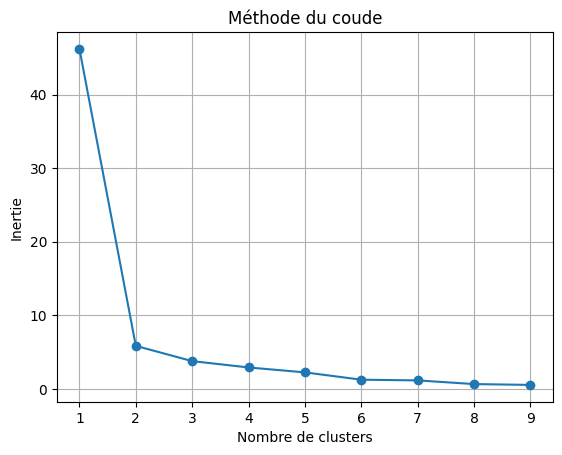

In [61]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title("Méthode du coude")
plt.grid(True)
plt.show()

## Entraînement du modèle KMeans avec 4 clusters

In [62]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)
df_clean['Cluster'] = kmeans.predict(df_normalized)

## Visualisation des clusters (Matplotlib)

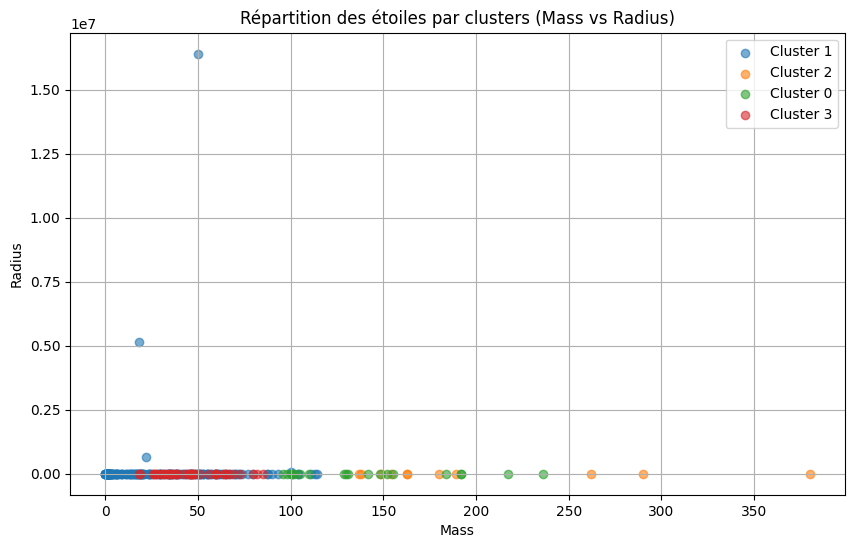

In [63]:
plt.figure(figsize=(10, 6))
for cluster_id in df_clean['Cluster'].unique():
    subset = df_clean[df_clean['Cluster'] == cluster_id]
    plt.scatter(subset['Mass'], subset['Radius'], label=f"Cluster {cluster_id}", alpha=0.6)
plt.xlabel("Mass")
plt.ylabel("Radius")
plt.title("Répartition des étoiles par clusters (Mass vs Radius)")
plt.legend()
plt.grid(True)
plt.show()

## Analyse complémentaire des clusters

In [66]:
df_clean['Cluster'].value_counts().sort_index()

Cluster
0     19
1    169
2     11
3     44
Name: count, dtype: int64

## Prédiction du cluster pour l’étoile Alnair

In [65]:
alnair_features = pd.DataFrame([[5.7, 101, 3.1]], columns=['Mass', 'Distance', 'Radius'])
alnair_scaled = scaler.transform(alnair_features)
alnair_cluster = kmeans.predict(alnair_scaled)[0]
print(f"L'étoile Alnair appartient au cluster {alnair_cluster}.")

L'étoile Alnair appartient au cluster 1.
